#Estimating house price

This Notebook will walk you through an example, at which we will estimate the price of house given its features.  
We will see how to load the data in our notebook, how to plot and inspect the different features, and how to train a basic linear regression model. 

This notebook is taken from this [source](https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1)


Other articles explaining ML models [here](https://towardsdatascience.com/smart-discounts-with-logistic-regression-machine-learning-from-scratch-part-i-3c242f4ded0)

We will start by loading some libarraies!
A library (or python module) is a collection of functions that someone implemented for you to reuse. 
Rememeber: to call a function from a library, you have to use the name of the library followed by dot '.' then the name of the function. For example:



```
os.getcwd()
```

In python you can rename the libraries in the import statemnet:


```
import seaborn as sns
import pandas as pd
import numpy as np 
```
Then you can refer to them using the new name!


In [ ]:
# always remember to import your libraries first --> this will give an error, if not proceeded by an import statement!
os.getcwd()

NameError: ignored

In [ ]:
import os 
os.getcwd()

'/content'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 10, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

wget is a command line util to download files, the following commnad will simply download and save house_prices_train.csv file locally for us, so that we can use it! 

In [ ]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv

--2020-12-16 09:48:26--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘house_prices_train.csv’

house_prices_train.   8%[>                   ]  40.17K  --.-KB/s    in 0.005s  

2020-12-16 09:48:28 (7.38 MB/s) - Read error at byte 41130/460676 (Connection reset by peer). Retrying.

--2020-12-16 09:48:29--  (try: 2)  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 460676 (450K), 419546 (410K) rem

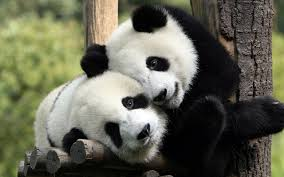


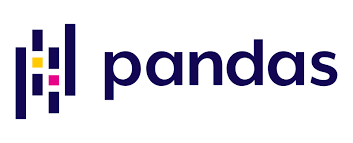

from [Wikipedia](https://en.wikipedia.org/wiki/Pandas_(software)): The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals. Its name is a play on the phrase "Python data analysis" itself.Wes McKinney started building what would become pandas at AQR Capital while he was a researcher there from 2007 to 2010.

First ste is to load our data in the notebook!

In [ ]:
df_train_full = pd.read_csv('house_prices_train.csv')

In [ ]:
df_train, df_test = train_test_split(df_train_full, test_size=0.2)

[train, validation, and test splits](https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7)

# Data exploration

Here we will visualise our data using [seaborn library](https://seaborn.pydata.org/tutorial/relational.html) (visualisation library based that helps us to plot "pretty" plots and is based on [matplotlib](https://matplotlib.org/3.3.3/tutorials/index.html) (which is another plotting library))

Pandas provide some functions that we can use to get information about the data. For example the following cell uses describe() function to print [summary statistics](https://towardsdatascience.com/understanding-descriptive-statistics-c9c2b0641291) about the data. Here we use it with a single column 'SalesPrice', which is the value we want to predict.

Try to:


1.  Use describe() to print stats of another column. Tip: you can use df_train.columns to print column names.
2.  Use describe() to print stats of all columns. Tip: you can use descripe() with the dataframe name





In [ ]:
df_train['SalePrice'].describe()

count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [ ]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
df_train["GrLivArea"].describe()

#df_train.describe()


count    1168.000000
mean     1527.401541
std       524.432686
min       334.000000
25%      1145.750000
50%      1473.000000
75%      1792.000000
max      5642.000000
Name: GrLivArea, dtype: float64

This is a [histogram plot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)
And more on distribution plots [here](https://seaborn.pydata.org/tutorial/distributions.html)

A histogram is a plot that shows the distribution of your features. It will divide your data points into bins and counts the number of items within each bin. 

Any observation in the following plot?

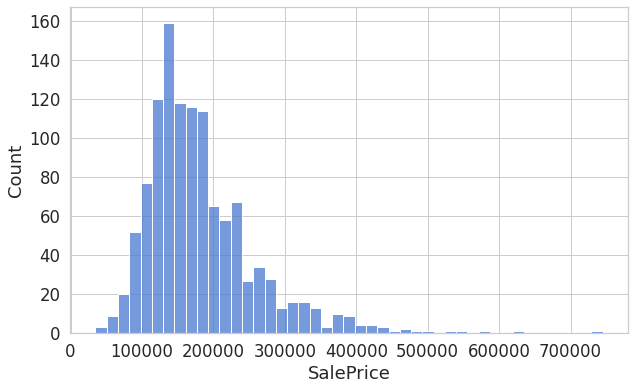

In [ ]:
sns.histplot(df_train['SalePrice'])

Now let's see how the SalePrice changes with other variable/feature in the dataset.
The example below shows a scatter plot of the SalePrice against GrLivArea (greater living area in square feet). 

Do you observe any trend in this plot?

Try to:

  1. Plot the SalePrice against another feature. 

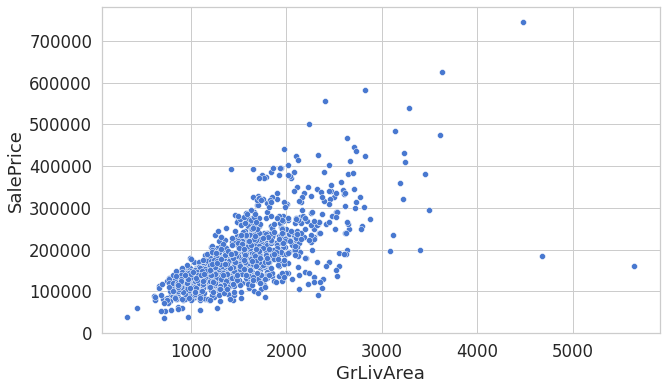

In [ ]:
var = 'GrLivArea'
sns.scatterplot(x=var, y='SalePrice', data=df_train)

Let's plot SalePrice against TotalBsmtSF (total basement area in square feet) 

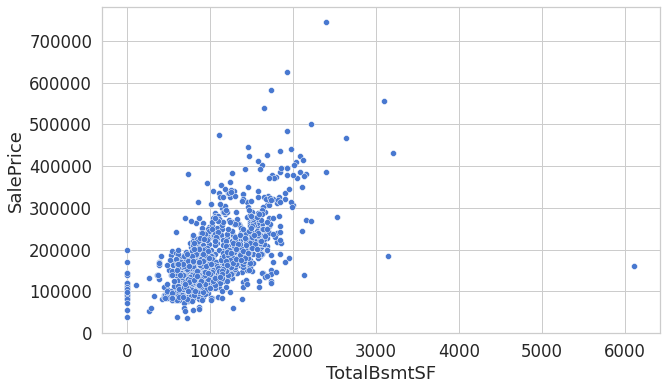

In [ ]:
var = 'TotalBsmtSF'
sns.scatterplot(x=var, y='SalePrice', data=df_train)

So far we have seen how to plot a histogram and a scatter plot, there is another cool plot called [Box Plot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51). The box plots displays the summary statistics, we printed earlier, in a box! 

We use it to see the spread of the data!

The boxes shows where 50% of the data lies, from 25th to 75th percetile. The line across the box is the median, and the horizontal line shows the range of the values.

How the price changes with the quality? Is it consistent?

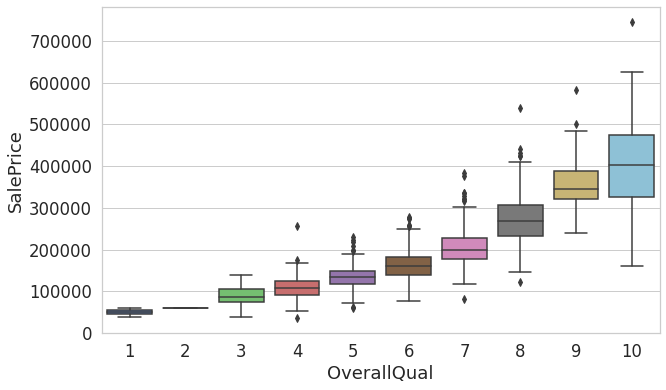

In [ ]:
var = 'OverallQual'
sns.boxplot(x=var, y="SalePrice", data=df_train)


### Correlations 
Correlation helps us to see how variables/features changes together, it gives the direction and the magnitude of change.
Correlation can be positive or negative, for example consider when the price of a house increases as the living area increases vs when it decreases as the house age increases. When two variables increases together, they are positively correlated; and when one of them increases as the other decreases, they are called negatively correlated. 

A nice interactive statistics guide: https://seeing-theory.brown.edu/

Covariance and Correlation refrence: https://bookdown.org/probability/beta/covariance-and-correlation.html

In [ ]:
corrmat = df_train.corr()

Plotting the top 10 correlated features with sale price.

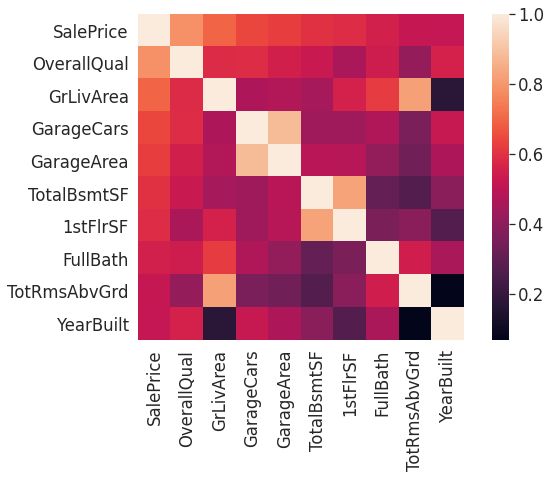

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

sns.heatmap(df_train[cols].corr(), square=True);

Pair plot can help view how a group of vaiables change toegther. Pair plot is a matrix of plots; the plots at the diagonal are histograms of the variables, and the off-diagonal plots are the scatter plots of each pair of variables. 
Variable names are listed on the y-axis and x-axis.

Try this:

1.   Plot another set of variables. Tip: change the cols var, by assigning to it another list of varibales from df_train.columns.



```
# Example
cols = ["SalePrice", ...]
# you can get column names by calling
df_train.columns
```



/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


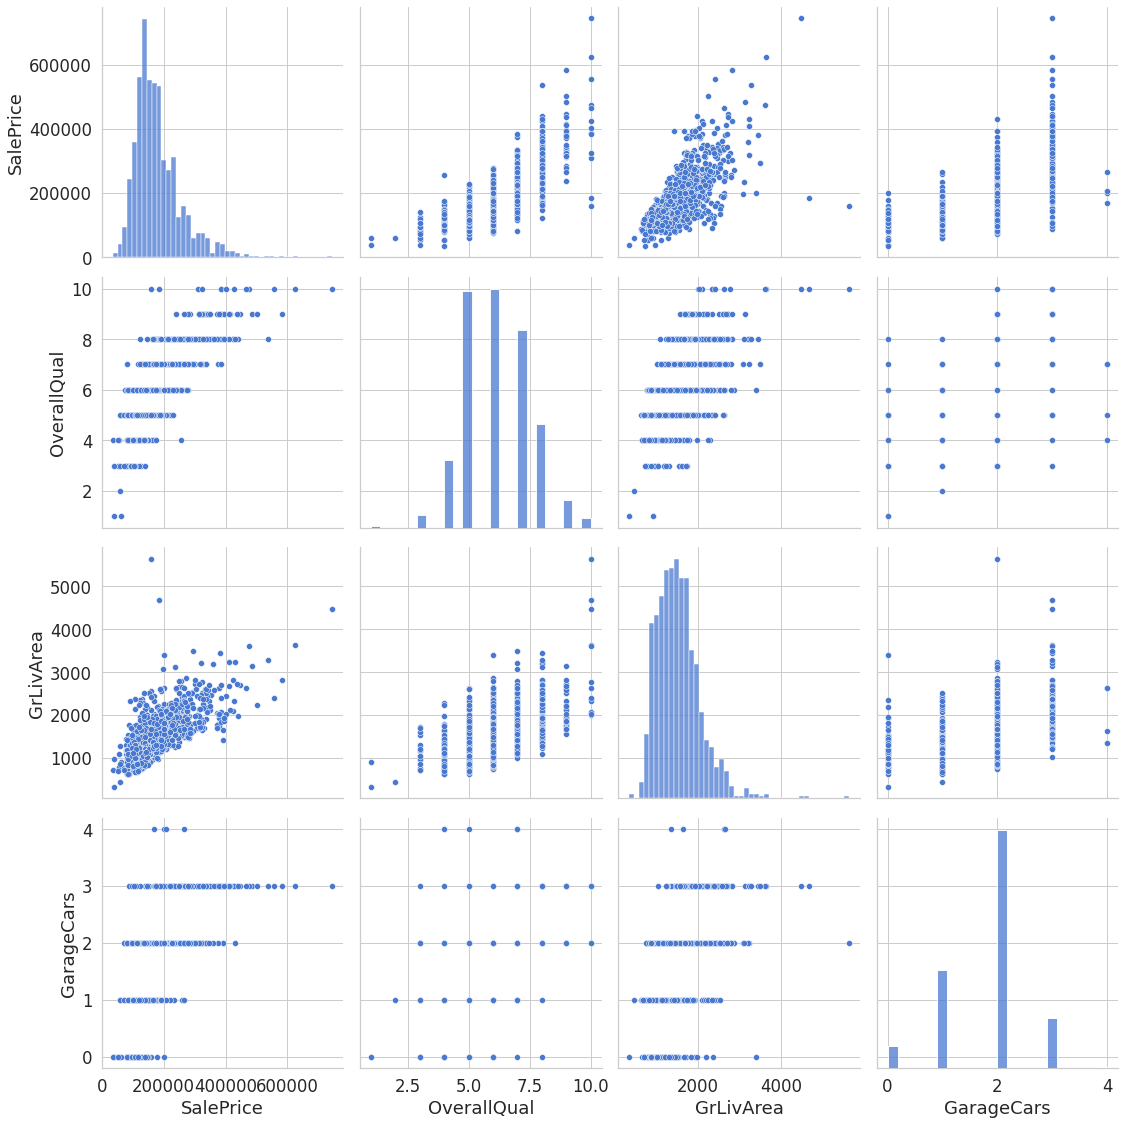

In [ ]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
sns.pairplot(df_train[cols], size = 4);

## Do we have missing data?

It is important to check for the missing data, and clean your data before building your model. 

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1162,0.994863
MiscFeature,1122,0.960616
Alley,1094,0.936644
Fence,935,0.800514
FireplaceQu,547,0.468322
LotFrontage,217,0.185788
GarageCond,64,0.054795
GarageType,64,0.054795
GarageYrBlt,64,0.054795
GarageFinish,64,0.054795


In [ ]:

def get_columns_with_NO_missing_values(target_df):
  """
    This is a simple function to get columns with no missing values
  """
  total = target_df.isnull().sum().sort_values(ascending=False)
  valid_columns = total[total == 0].index.tolist()
  return valid_columns

In [ ]:
# Cleaning test and train by removing columns with missing values
columns_keep_train = get_columns_with_NO_missing_values(df_train)
columns_keep_test = get_columns_with_NO_missing_values(df_train)
columns_keep_train_test = set(columns_keep_train).intersection(set(columns_keep_test))
df_test_clean = df_test[columns_keep_train_test]
df_train_clean = df_train[columns_keep_train_test]

# Predicting the sale price

## Preparing the data

### Feature scaling

We will do a little preprocessing to our data using the following formula (standardization):

$$x'= \frac{x - \mu}{\sigma}$$

where $\mu$ is the population mean and $\sigma$ is the standard deviation.

![](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/FeatureScaling.jpg)

**Source: Andrew Ng**

[The importance of feature scaling](https://towardsdatascience.com/gradient-descent-the-learning-rate-and-the-importance-of-feature-scaling-6c0b416596e1)

In [ ]:
x = df_train['GrLivArea']
y = df_train['SalePrice']

In [ ]:
def normalize_data(target_df):
  mu = target_df.mean()
  segma = target_df.std()
  return (target_df - mu ) / segma

In [ ]:
x = normalize_data(x)

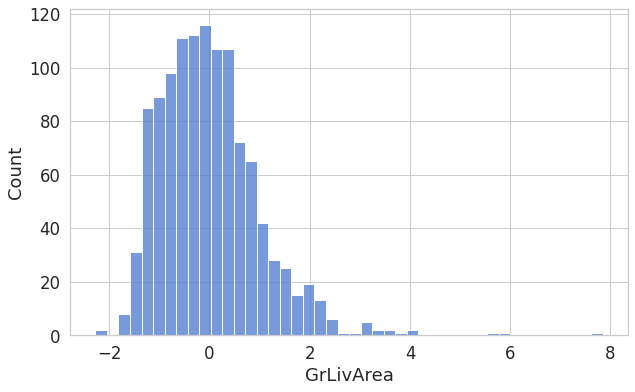

In [ ]:
sns.histplot(x)

## Linear Regression

![](https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg)

**Source: MyBookSucks**

Linear regression models assume that the relationship between a dependent continuous variable $Y$ and one or more explanatory (independent) variables $X$ is linear (that is, a straight line). It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). Linear regression models can be divided into two main types:

### Simple Linear Regression

Simple linear regression uses a traditional slope-intercept form, where $a$ and $b$ are the coefficients that we try to “learn” and produce the most accurate predictions. $X$ represents our input data and $Y$ is our prediction.

$$Y = bX + a$$

![](https://spss-tutorials.com/img/simple-linear-regression-equation-linear-relation.png)

**Source: SPSS tutorials**

### Multivariable Regression

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

$$ Y(x_1,x_2,x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0$$

The variables $x_1, x_2, x_3$ represent the attributes, or distinct pieces of information, we have about each observation.

## Loss function

Given our Simple Linear Regression equation:

$$Y = bX + a$$

We can use the following cost function to find the coefficients:

### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2$$

where

$$h_w(x) = g(w^Tx)$$

The MSE measures how much the average model predictions vary from the correct values. The number is higher when the model is performing "bad" on the training set.

The first derivative of MSE is given by:

$$MSE' = J'(W) = \frac{2}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$


### One Half Mean Squared Error (OHMSE)

We will apply a small modification to the MSE - multiply by $\frac{1}{2}$ so when we take the derivative, the `2`s cancel out:

$$ OHMSE = J(W) =  \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2 $$

The first derivative of OHMSE is given by:

$$OHMSE' = J'(W) = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$

## Simple Linear Regression implementation and visualisation


In [ ]:
def add_dummy_intercept(target_df):
  return np.c_[np.ones(target_df.shape[0]), target_df]


In [ ]:
x = add_dummy_intercept(x)

In [ ]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [ ]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [ ]:
run_tests()

.....
----------------------------------------------------------------------
Ran 5 tests in 0.009s

OK


In [ ]:
class LinearRegressionCustom:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

In [ ]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegressionCustom()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))

In [ ]:
run_tests()

F.....
FAIL: test_find_coefficients (__main__.TestLinearRegression)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-31-6cfb809fef60>", line 6, in test_find_coefficients
    np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))
  File "/usr/local/lib/python3.6/dist-packages/numpy/testing/_private/utils.py", line 1047, in assert_array_almost_equal
    precision=decimal)
  File "/usr/local/lib/python3.6/dist-packages/numpy/testing/_private/utils.py", line 846, in assert_array_compare
    raise AssertionError(msg)
AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 2 / 2 (100%)
Max absolute difference: 2546.34206653
Max relative difference: 0.0452322
 x: array([181441.541614,  53748.559933])
 y: array([180921.195553,  56294.901999])

----------------------------------------------------------------------
Ran 6 tests in 1.463s

FAILED (failures=1)

In [ ]:
clf = LinearRegressionCustom()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [ ]:
clf._W

array([181441.54161389,  53748.55993272])

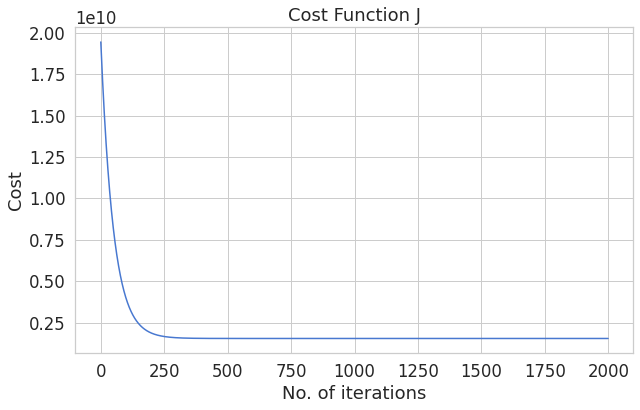

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [ ]:
clf._cost_history[-1]

1539058026.9290602

In [ ]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y)
line, = ax.plot([], [], lw=2, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = clf._w_history[i][1]*x + clf._w_history[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (clf._cost_history[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=10, blit=True)

rc('animation', html='jshtml')

anim

## Using scikit learn Linera regression model 

In [ ]:
from sklearn.linear_model import LinearRegression
x = df_train['GrLivArea']
y = df_train['SalePrice']

x = normalize_data(x)
X = x.values.reshape(-1,1)
lr_reg = LinearRegression().fit(X, y)

In [ ]:
x_test  =  df_test_clean["GrLivArea"]
x_test = normalize_data(x_test)
y_test = df_test_clean["SalePrice"]
y_pred = lr_reg.predict(x_test.values.reshape(-1,1))

In [ ]:
lr_reg.score(x_test.values.reshape(-1,1),y_test)

0.5538379963365323

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
r2_score(y_test, y_pred)

0.5538379963365323

 [How to interpret R2 score ](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)

In [ ]:
# compare with the custom imp
x_test_c =  add_dummy_intercept(x_test)
y_pred_c = clf.predict(x_test_c)
r2_score(y_test, y_pred_c)


0.5538379962257922

[How to evaluate ML models](https://www.jeremyjordan.me/evaluating-a-machine-learning-model/)

# Multivariate Regression

Let's use more of the available data to build a Multivariable Linear Regression model and see whether or not that will improve our OHMSE error:

In [ ]:
selected_columns_names = ['OverallQual', 'GrLivArea', 'GarageCars']
x = df_train[selected_columns_names]

x = normalize_data(x)
x = add_dummy_intercept(x) 

lr_model = LinearRegressionCustom()
lr_model.fit(x, y, n_iter=2000, lr=0.01)

In [ ]:
lr_model._W

array([181441.54161389,  36609.3553228 ,  24770.77873222,  16463.76603903])

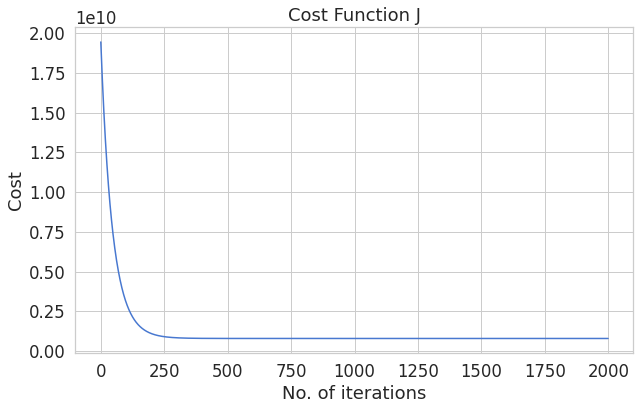

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(lr_model._cost_history)
plt.show()

In [ ]:
lr_model._cost_history[-1]

799749699.6605316

In [ ]:
x_test_c = df_test_clean[selected_columns_names]
y_test = df_test_clean["SalePrice"]
x_test_c = normalize_data(x_test_c)
x_test_c =  add_dummy_intercept(x_test_c)
y_pred_c = lr_model.predict(x_test_c)
r2_score(y_test, y_pred_c)

0.7560486748039261

## Using RandomForest Regressor 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
selected_columns_names = ['OverallQual', 'GrLivArea', 'GarageCars']
rf_reg = RandomForestRegressor(max_depth=2, random_state=7)

X =  df_train_clean[selected_columns_names]
y =  df_train_clean["SalePrice"]
rf_reg.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [ ]:
X_test = df_test_clean[selected_columns_names]
y_test = df_test_clean["SalePrice"]
y_pred = rf_reg.predict(X_test)
rf_reg.score(X_test, y_test)
r2_score(y_test, y_pred)

0.6989546016602152